In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [2]:
def chi_square_red(x, y, yerr, modelfunc, p_opt):
    # Reduced Chi Squared Reading. It Outputs value for accuracy of Fit. Should be near 1
    # INPUT: x( x variable as an array), y ( y variable as an array)
        # yerr( array of same length as y, as value, not as percentage), modelfunc( a previously defined fit function)
        # p_opt ( the parameters of the fit function. If you output fitting as an array labeled fit, this would be fit[1]
    # OUTPUT chired (a float that is X^2 )
    numerator = (y - modelfunc(x, *p_opt)) ** 2 # numerator in formula 
    denominator = yerr ** 2                     # denominator in formula 
    chi = sum(numerator / denominator)          # X^2 itself
    chired = chi / (len(y) - len(p_opt))       # reduces it by number of points versus number of parameters
    return chired
def fitting(function,xdata,ydata,  guess,sigma = 0):
    # Fit Function, is basically just a wrapper of scipy.curve_fit but gives me how I like it
    # INPUT function(same as modelfunc above, the function you fit data to)
        # xdata( x data as array), ydata( y data as an array)   
        # guess( array of guess for parameters) sigma( define array of errors if you have them)
    # OUTPUT 3 things, a 20 array of the fit, the parameters, and covariance matrix
    if type(sigma) is int:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess)
    else:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess, sigma = sigma, absolute_sigma = True)
    return function(np.linspace(np.min(xdata), np.max(xdata),20),*fit_opt), fit_opt, fit_cov 

In [5]:
gravity_data = np.loadtxt('gravity.csv', delimiter= ',', usecols=(0,1), unpack = True)

### Formula Used
$$ R =  \frac{-2 g \Delta R  } { \Delta g } $$

In [10]:
## Generating Constants
gravity_constant = 980.665 # gravitational force in gals
floor_size = 395           # 395cm given in lab manual
k = 0.10023/1000          # constant given on dial, converted from milligals to gal

In [11]:
gravity_data[0] = gravity_data[0]*k
gravity_data[1] = gravity_data[1]*k

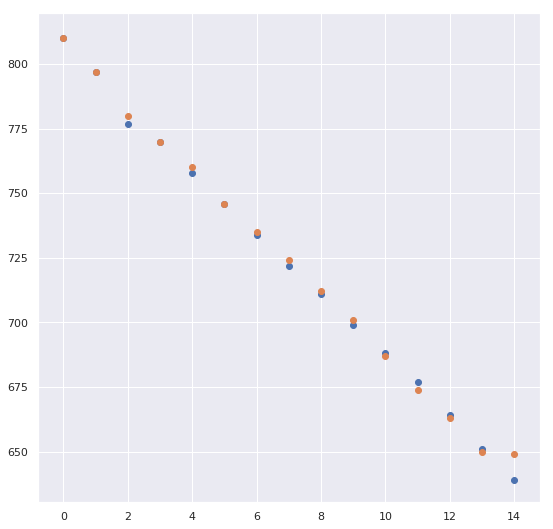

In [7]:
x_axis = np.linspace(0,14,15)
plt.figure(figsize = (9,9))
plt.scatter(x_axis,gravity_data[0])
plt.scatter(x_axis,gravity_data[1])
